In [25]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [26]:
scenario = str(2089)
path_to_results = r"C:\toolbox-amiris-emlab\emlabpy\plots\Scenarios\NL-fix_profiles"

path_to_results = os.path.join(path_to_results, scenario + ".xlsx" )

path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS_Results", scenario )
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
    
elec_prices_data =  pd.read_excel(path_to_results, sheet_name='energy_exchange', index_col=0)  

In [27]:
marginal_price = {
    0: "PV",
    48.58: "Industrial heat",
    33.00: "Electrolyzer",
    2.70: "Offshore",
    1.35: "Onshore",
    9.93: "Nuclear",
    4000: "VOLL",
    1500: "HighLS",
    500: "MedLS",
    250: "LowLS",
    114.25: "H2 turbine"
}
fuel_colors = {
    'Industrial heat': "black",
    'H2 turbine': "darkred",
    "PV": "gold",
    'Nuclear': "mediumorchid",
    'Offshore': "navy",
    'Onshore': "blue",
    'notfound': "purple",
    'Electrolyzer': "gray",
    "LowLS": "lemonchiffon",
    'HighLS': "darkorange",
    'MedLS': "orange",
    "VOLL": "lime",
    "Wind and Solar": "green",
    "Nuclear and H2 turbines" : "darkred", 
    "Static Load": "purple"
}

<AxesSubplot:>

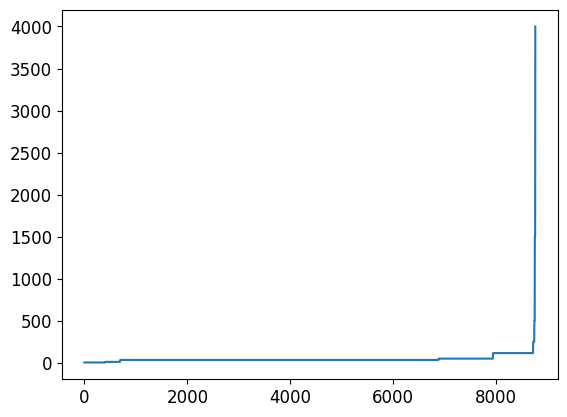

In [28]:
elec_prices_data.sort_values(by="ElectricityPriceInEURperMWH", inplace = True, ignore_index=True)
elec_prices_data["ElectricityPriceInEURperMWH"] = round(elec_prices_data["ElectricityPriceInEURperMWH"],2)
elec_prices_data["ElectricityPriceInEURperMWH"].plot()

In [29]:

MeritOrder =pd.DataFrame()

In [30]:
MeritOrder["Price"]  = elec_prices_data["ElectricityPriceInEURperMWH"]
MeritOrder["CumulatedPower"] = elec_prices_data.index

MeritOrder["Fuel"] = elec_prices_data["ElectricityPriceInEURperMWH"].apply(
    lambda x: marginal_price.get(x)
)


In [33]:
matrix = MeritOrder[['Fuel', 'Price', 'CumulatedPower']].values
MeritOrder = np.zeros((0,3))

In [34]:
for el in range(len(matrix)-1):
    MeritOrder = np.append(MeritOrder, np.reshape(matrix[el,], (1,3)), axis=0)
    if matrix[el,0] != matrix[el+1,0]:
        obj = np.reshape(matrix[el,], (1,3))
        obj[0][0] = matrix[el+1,0]
        MeritOrder = np.append(MeritOrder, obj, axis=0)

MeritOrder = pd.DataFrame(
    data=MeritOrder, 
    columns=['Fuel', 'Price', 'CumulatedPower']
)
MeritOrder = MeritOrder.astype({'CumulatedPower': 'float32', 'Price': 'float32'})


,Fuel,Price,CumulatedPower
0,Offshore,2.7,0.0
1,Offshore,2.7,1.0
2,Offshore,2.7,2.0
3,Offshore,2.7,3.0
4,Offshore,2.7,4.0
...,...,...,...
8762,HighLS,1500.0,8755.0
8763,HighLS,1500.0,8756.0
8764,VOLL,1500.0,8756.0
8765,VOLL,4000.0,8757.0


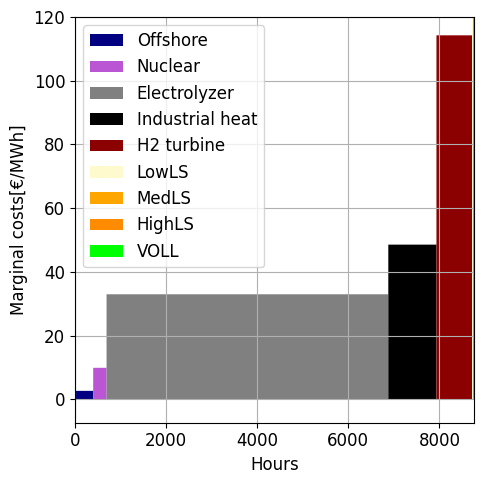

In [44]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize = (5,5))

for fuel in MeritOrder['Fuel'].unique():
    _ = ax.fill_between(x='CumulatedPower',
                        y1='Price',
                        where = MeritOrder["Fuel"] == fuel,
                        facecolor = fuel_colors[fuel],
                        step = "pre",
                        lw = 15,
                        #        interpolate = True,
                        data = MeritOrder,
                        label=fuel)

_ = ax.set(
    xlim=(0, MeritOrder['CumulatedPower'].max()),
    ylim=(MeritOrder['Price'].min() - 10, 120)
           #lim=(-200, 300)
)
_ = plt.xlabel('Hours')
_ = plt.ylabel('Marginal costs[€/MWh]')
_ = ax.legend(loc='upper left', ncol=1)
_ = ax.grid(True, which='major')

plt.tight_layout()

plt.savefig("merit_order_plot.png")

plt.show()